In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as ticker

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import gif
import imageio

In [36]:
DOS_TEST = np.loadtxt('DOS_100.dat').view(complex)
E = np.loadtxt('E.dat')
x = np.arange(12)

EE, X = np.meshgrid(E, x)

In [35]:
E.shape

(6,)

In [37]:
DOS_TEST.shape

(1000, 12)

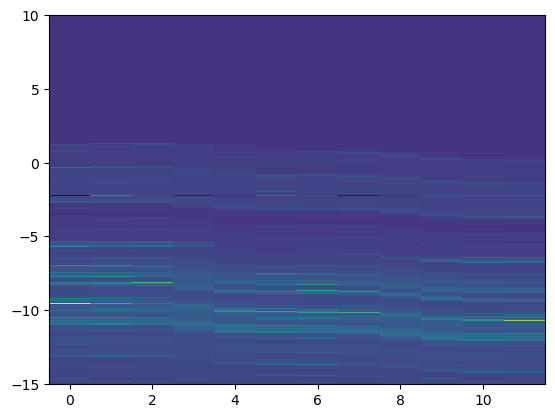

In [7]:
plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [ ]:
@gif.frame
def plot_standard():
    plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [31]:
@gif.frame
def plot_gold(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 11.55, 100)
    Efl_dotted = EFL[i] * np.ones((20))
    Efr_dotted = EFR[i] * np.ones((20))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 250)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(10.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-10, 10)

In [35]:
def plot_io(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 11.55, 100)
    Efl_dotted = EFL[i] * np.ones((7))
    Efr_dotted = EFR[i] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    fig = plt.figure(figsize = (13,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 250)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(10.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-4, 10)
    return fig

In [ ]:
frames = [plot_gold(i) for i in range(162)]
gif.save(frames, 'DOS.gif', duration = 100)

frames = [plot_gold(0)]
gif.save(frames, 'DOS_0.gif', duration = 3000)

frames = [plot_gold(199)]
gif.save(frames, 'DOS_199.gif', duration = 3000)

In [ ]:
frames  = []
for i in range(200):
    fig = plot_io(i)
    canvas = FigureCanvas(fig)
    canvas.draw()
    image = np.array(canvas.renderer.buffer_rgba())

    frames.append(image)
    plt.clf()
    matplotlib.pyplot.close(fig)
imageio.mimsave('DOS_io.gif', frames, duration = 0.1)


In [37]:
@gif.frame
def plot_idE_gold(i):

    font = {'weight' : 'normal',
	'size'   : 28}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    IDE_TEST = np.loadtxt('IDE_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 10.55, 100)
    Efl_dotted = EFL[i] * np.ones((7))
    Efr_dotted = EFR[i] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (16,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, norm = colors.SymLogNorm(linthresh = 1e-8, linscale = 1, vmin = -1e-4, vmax = 1e-4), shading = 'auto')
    #plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, vmin = -2e-3, vmax = 2e-3)
    #norm = colors.SymLogNorm(linthresh = 0.01, linscale = 0.01, vmin = -1.2, vmax = 1.2), shading = 'auto'
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt))
    cbar.ax.set_ylabel('IDE' + ' ' + r'$[\mathbf{A \cdot \left( eV\cdot nm ^2 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i]-0.05, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(10.55-1.50, EFR[i]-0.15, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-5, -3)
    plt.xlim(-0.5, 10.55)

In [30]:
def plot_idE(i):

    font = {'weight' : 'normal',
	'size'   : 28}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    IDE_TEST = np.loadtxt('IDE_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 10.55, 100)
    Efl_dotted = EFL[i] * np.ones((7))
    Efr_dotted = EFR[i] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    fig = plt.figure(figsize = (16,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, norm = colors.SymLogNorm(linthresh = 1e-3, linscale = 1, vmin = -1e-1, vmax = 1e-1), shading = 'auto')
    #plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, vmin = -2e-3, vmax = 2e-3)
    #norm = colors.SymLogNorm(linthresh = 0.01, linscale = 0.01, vmin = -1.2, vmax = 1.2), shading = 'auto'
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt))
    cbar.ax.set_ylabel('IDE' + ' ' + r'$[\mathbf{A \cdot \left( eV\cdot nm ^2 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i]-0.05, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(8.55-0.50, EFR[i]-0.05, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-15, 10)
    plt.xlim(-0.5, 10.55)
    return fig

In [ ]:
frames = []
for i in range(200):
    fig = plot_idE(i)
    canvas = FigureCanvas(fig)
    canvas.draw()
    image = np.array(canvas.renderer.buffer_rgba())

    frames.append(image)
    plt.clf()
    matplotlib.pyplot.close(fig)   
imageio.mimsave('IDE_io.gif', frames, duration = 0.1)

In [ ]:
frames_ide = [plot_idE_gold(i) for i in range(10)]
gif.save(frames_ide, 'IDE.gif', duration = 500)

frames_ide = [plot_idE_gold(0)]
gif.save(frames_ide, 'IDE_0.gif', duration = 3000)

frames_ide = [plot_idE_gold(199)]
gif.save(frames_ide, 'IDE_199.gif', duration = 3000)

Conservation condition satisfied at iteration 0


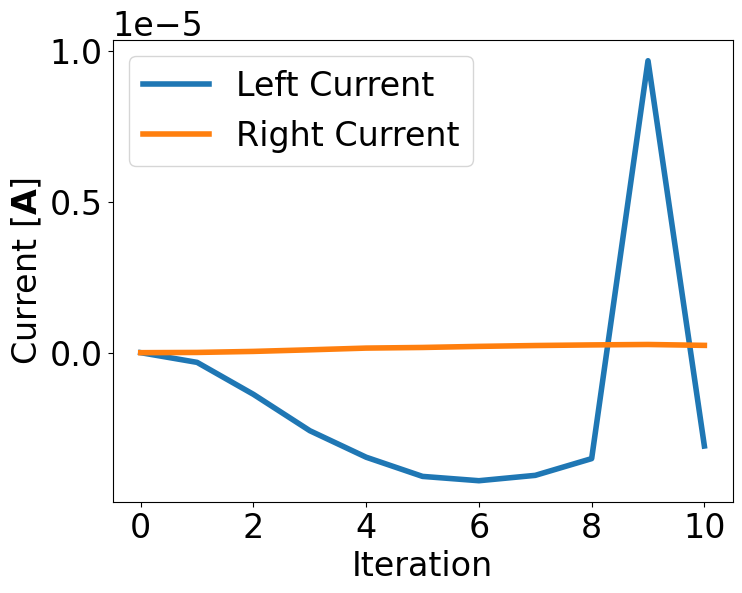

In [19]:
num_iter = 11
nblocks = 12
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)

ID_L = np.zeros((num_iter)) # left current
ID_R = np.zeros((num_iter)) # right current
ID_M = np.zeros((num_iter)) # middle current
conservation_cond = np.zeros((num_iter))
E = np.loadtxt('E.dat')
dE = E[1] - E[0]
for i in range(num_iter):
    IDE_temp = np.loadtxt('IDE_' + str(i) + '.dat').view(complex)
    ID_L[i] = np.sum(IDE_temp.real, axis = 0)[0] * dE
    ID_R[i] = np.sum(IDE_temp.real, axis = 0)[-2] * dE
    ID_M[i] = np.sum(IDE_temp.real, axis = 0)[nblocks//2] * dE

    conservation_cond[i] = (ID_L[i]-ID_R[i])/(ID_R[i])
    if np.abs(conservation_cond[i]) < 0.05:
        print('Conservation condition satisfied at iteration', i)

plt.figure(figsize=(8,6))
plt.plot(np.arange(num_iter), ID_L, label = 'Left Current', linewidth = 4)
plt.plot(np.arange(num_iter), ID_R, label = 'Right Current', linewidth = 4)
#plt.plot(np.arange(num_iter), ID_M, label = 'Middle Current')
plt.xlabel('Iteration')
plt.ylabel('Current' + ' ' + r'$[\mathbf{A}]$')
plt.legend()
plt.show()

#print("the best converged iteration is ", np.argmin(np.abs(conservation_cond[100:])))


(-5.0, -3.0)

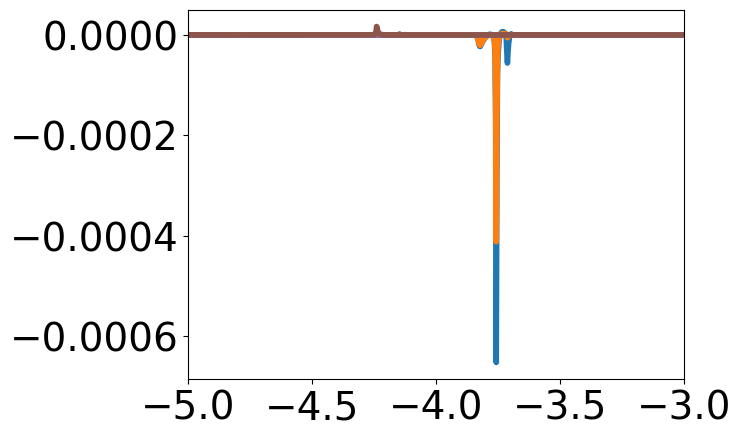

In [40]:
iter = 5
IDE_temp = np.loadtxt('IDE_' + str(iter) + '.dat').view(complex)
plt.plot(E, IDE_temp.real[:,0], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,1], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,3], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,5], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,7], label = 'Left Current', linewidth = 4)
plt.plot(E, IDE_temp.real[:,-2], label = 'Right Current', linewidth = 4)
plt.xlim(-5, -3)

In [21]:
iter = 10
IDE_temp = np.loadtxt('IDE_' + str(iter) + '.dat').view(complex)
print(np.sum(IDE_temp.real, axis = 0)[0] * dE)
print(np.sum(IDE_temp.real, axis = 0)[-2] * dE)


-3.0914542577680085e-06
2.4190673619420437e-07


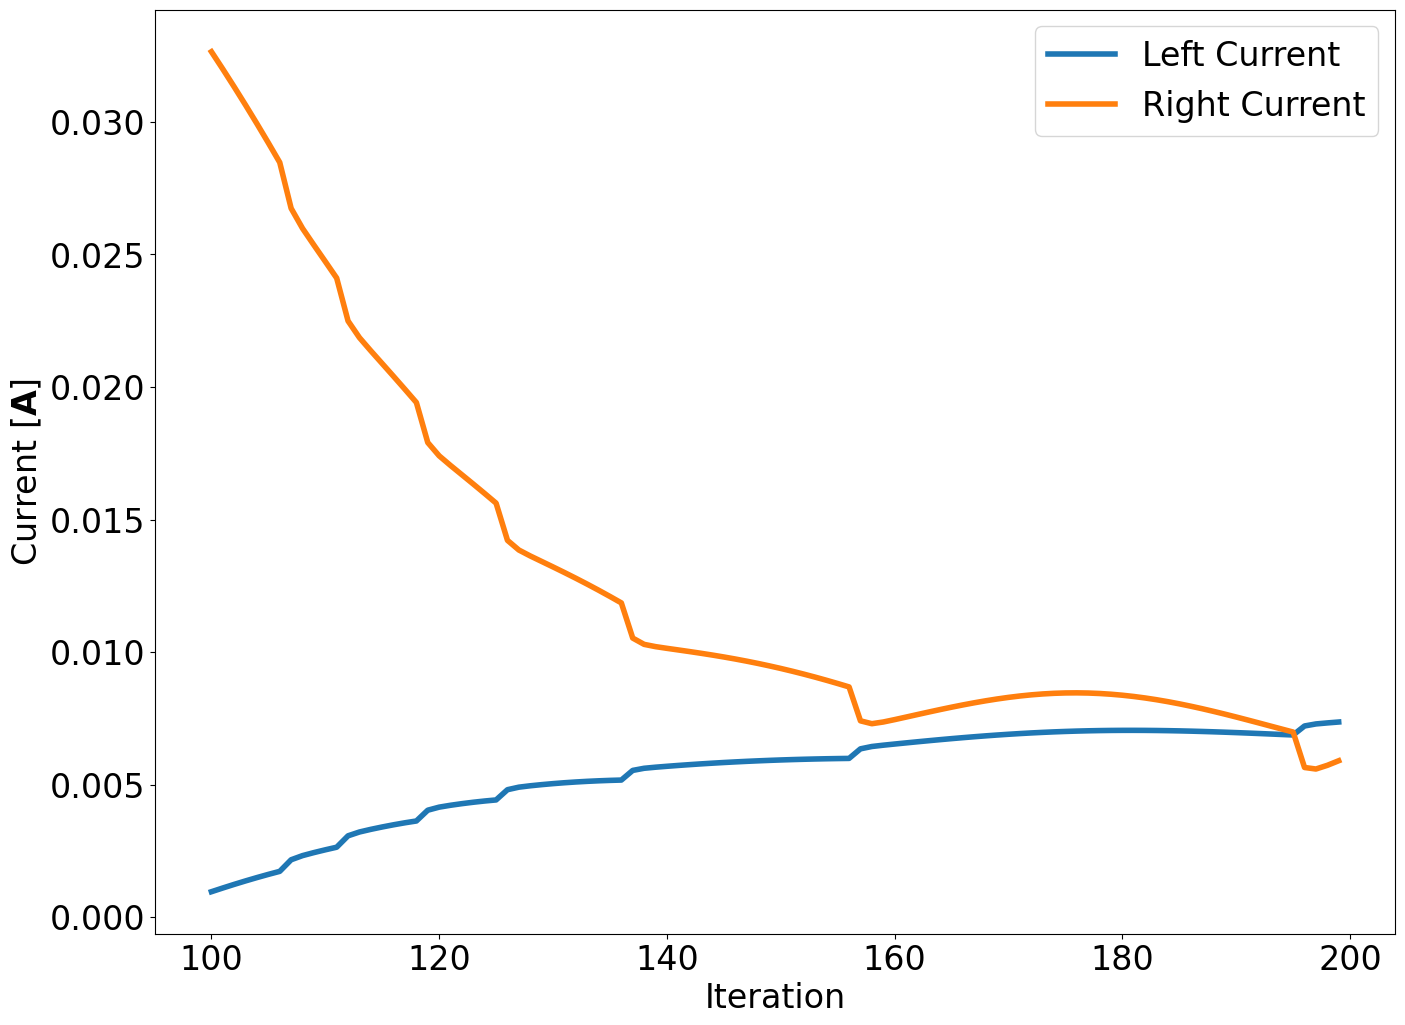

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(np.arange(num_iter)[100:], ID_L[100:], label = 'Left Current', linewidth = 4)
plt.plot(np.arange(num_iter)[100:], ID_R[100:], label = 'Right Current', linewidth = 4)
#plt.plot(np.arange(num_iter), ID_M, label = 'Middle Current')
plt.xlabel('Iteration')
plt.ylabel('Current' + ' ' + r'$[\mathbf{A}]$')
plt.legend()
plt.show()


In [ ]:
conservation_cond[195]

-0.01587072954146933

In [ ]:
ID_L[179]

0.00727851257460966

Conservation condition satisfied at iteration 0
Conservation condition satisfied at iteration 1


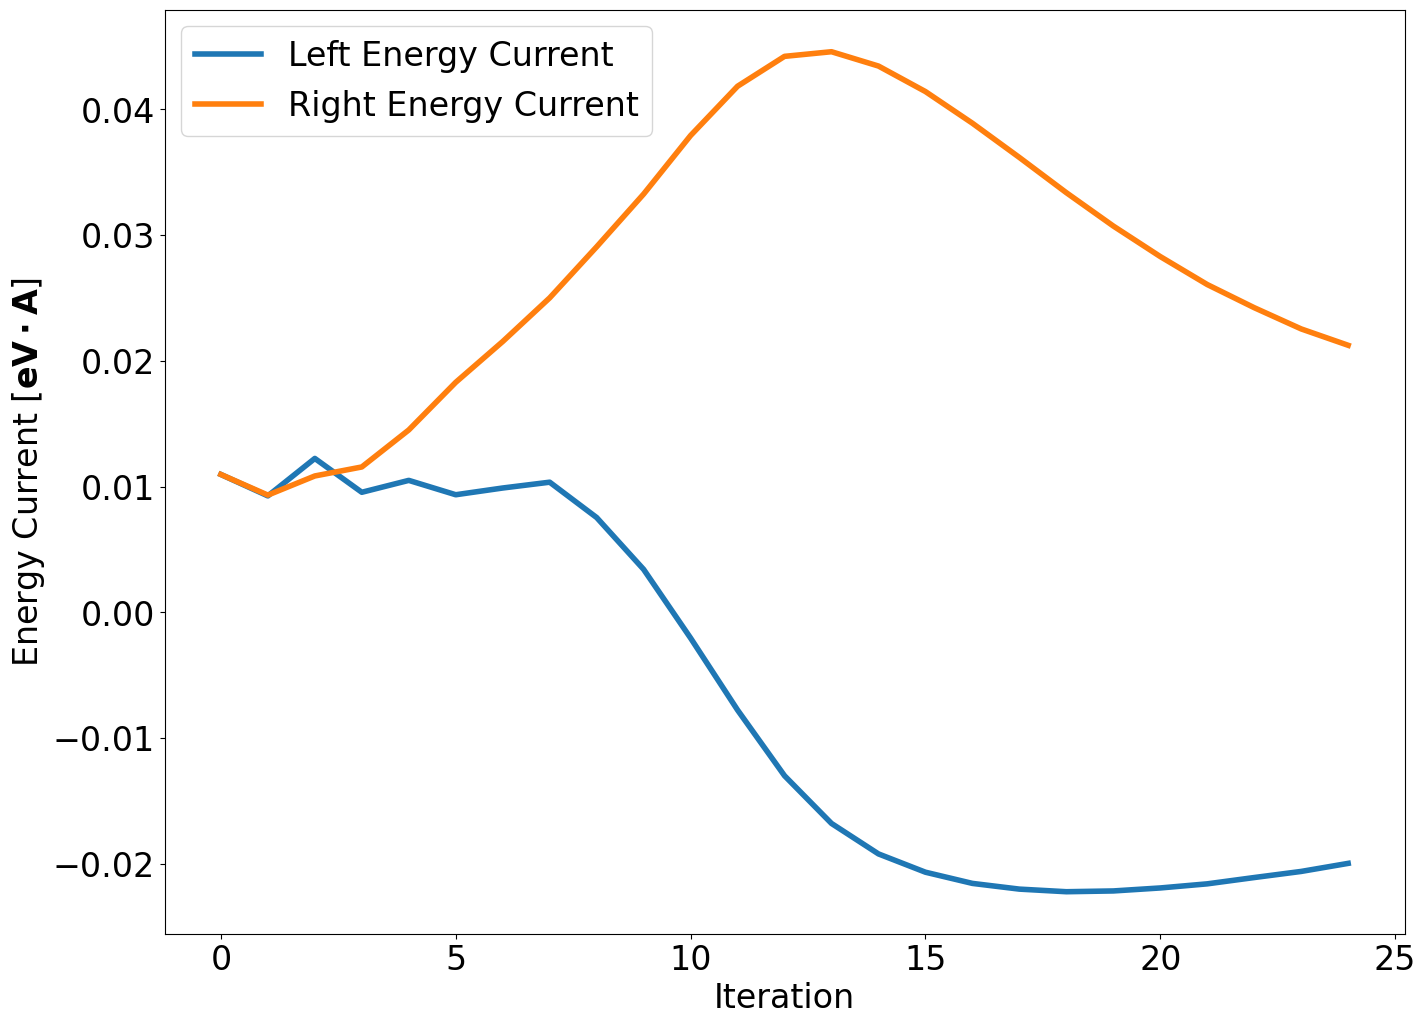

In [ ]:
num_iter = 25
nblocks = 10
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)

ID_L = np.zeros((num_iter)) # left energy current
ID_R = np.zeros((num_iter)) # right energy current
ID_M = np.zeros((num_iter)) # middle energy current
E = np.loadtxt('E.dat')
dE = E[1] - E[0]
for i in range(num_iter):
    IDE_temp = np.loadtxt('IDE_' + str(i) + '.dat').view(complex)
    ID_L[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[0] * dE
    ID_R[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[-1] * dE
    ID_M[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[nblocks//2] * dE

    conservation_cond = (ID_L[i]-ID_R[i])/(ID_R[i])
    if np.abs(conservation_cond) < 0.04:
        print('Conservation condition satisfied at iteration', i)

plt.figure(figsize=(16,12))
plt.plot(np.arange(num_iter), ID_L, label = 'Left Energy Current', linewidth = 4)
plt.plot(np.arange(num_iter), ID_R, label = 'Right Energy Current', linewidth = 4)
#plt.plot(np.arange(num_iter), ID_M, label = 'Middle Current')
plt.xlabel('Iteration')
plt.ylabel('Energy Current' + ' ' + r'$[\mathbf{eV \cdot A}]$')
plt.legend()
plt.show()

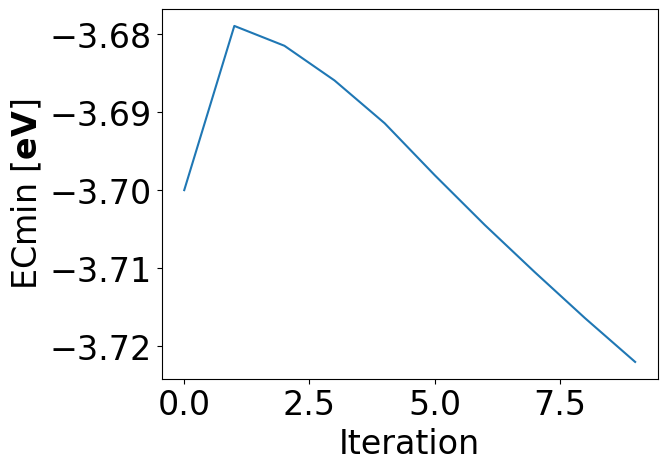

In [9]:
num_iter = 10
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)
ECmin_vec = np.loadtxt('ECmin.dat')
plt.figure()
plt.plot(np.arange(num_iter), ECmin_vec[0:num_iter])
plt.xlabel('Iteration')
plt.ylabel('ECmin' + ' ' + r'$[\mathbf{eV}]$')
plt.show()


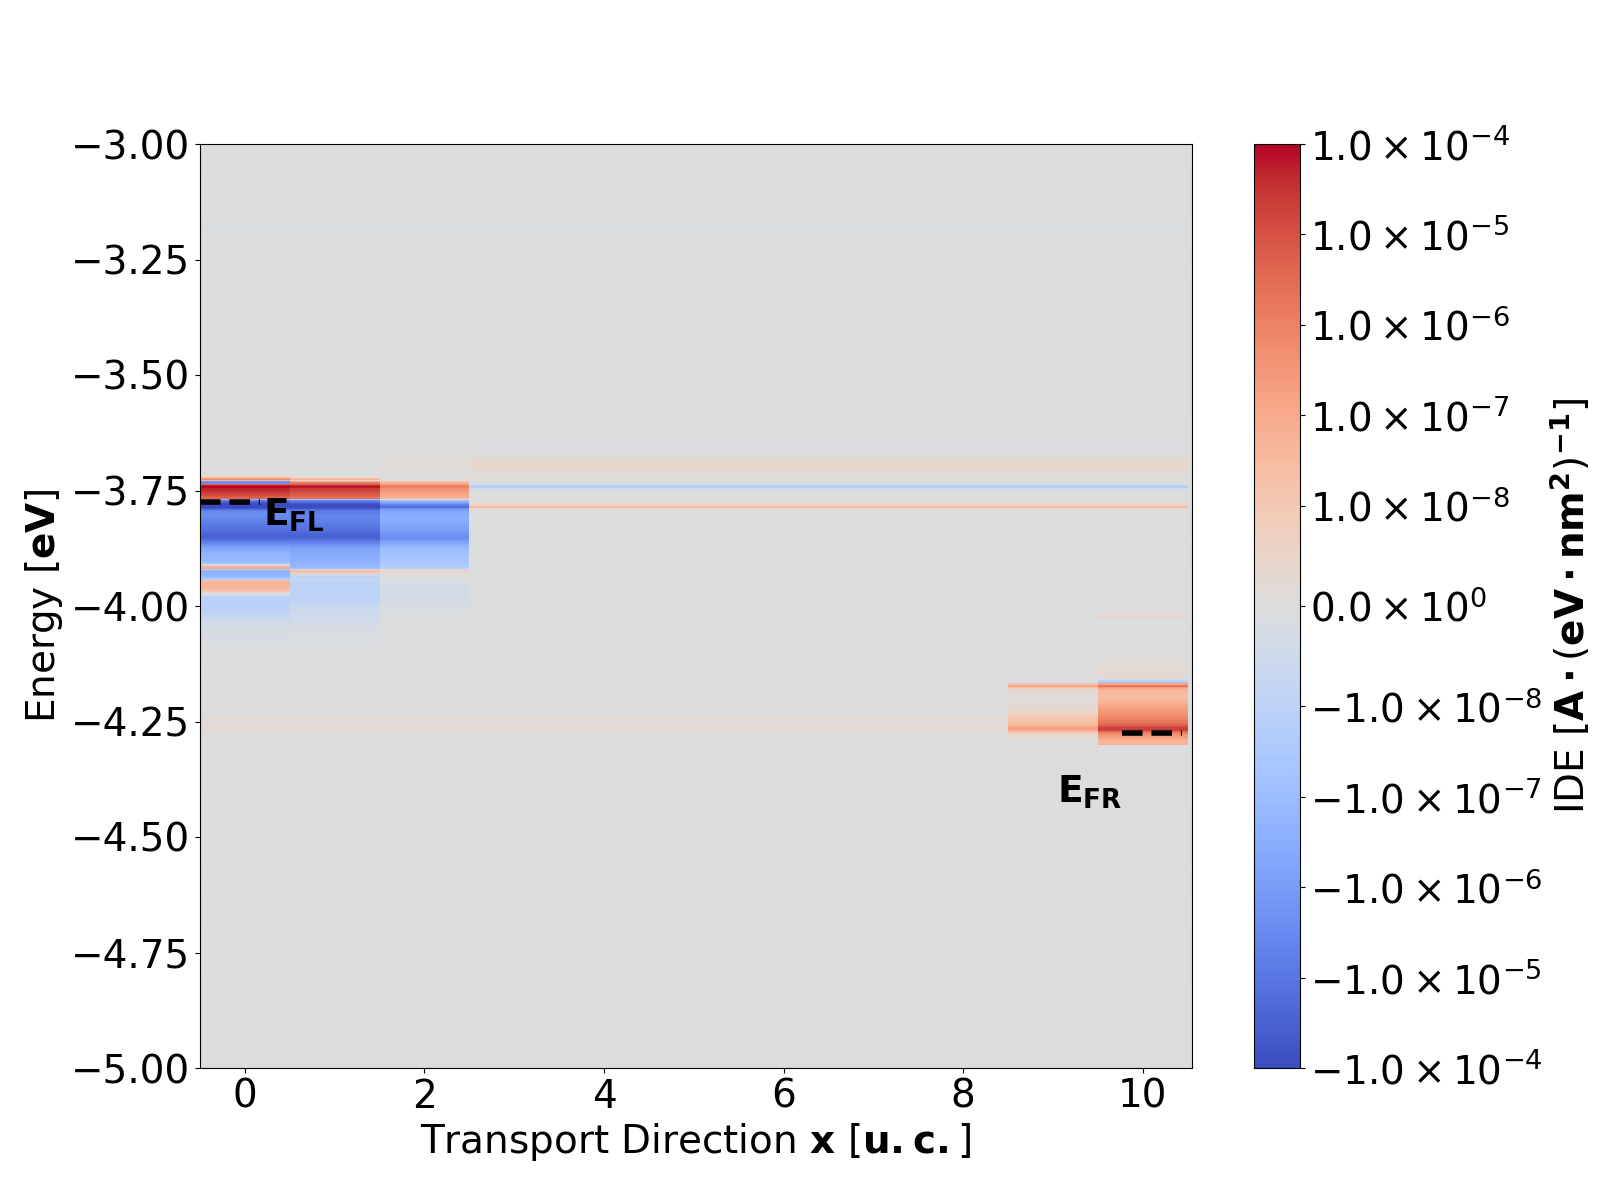

In [38]:
plot_idE_gold(10)

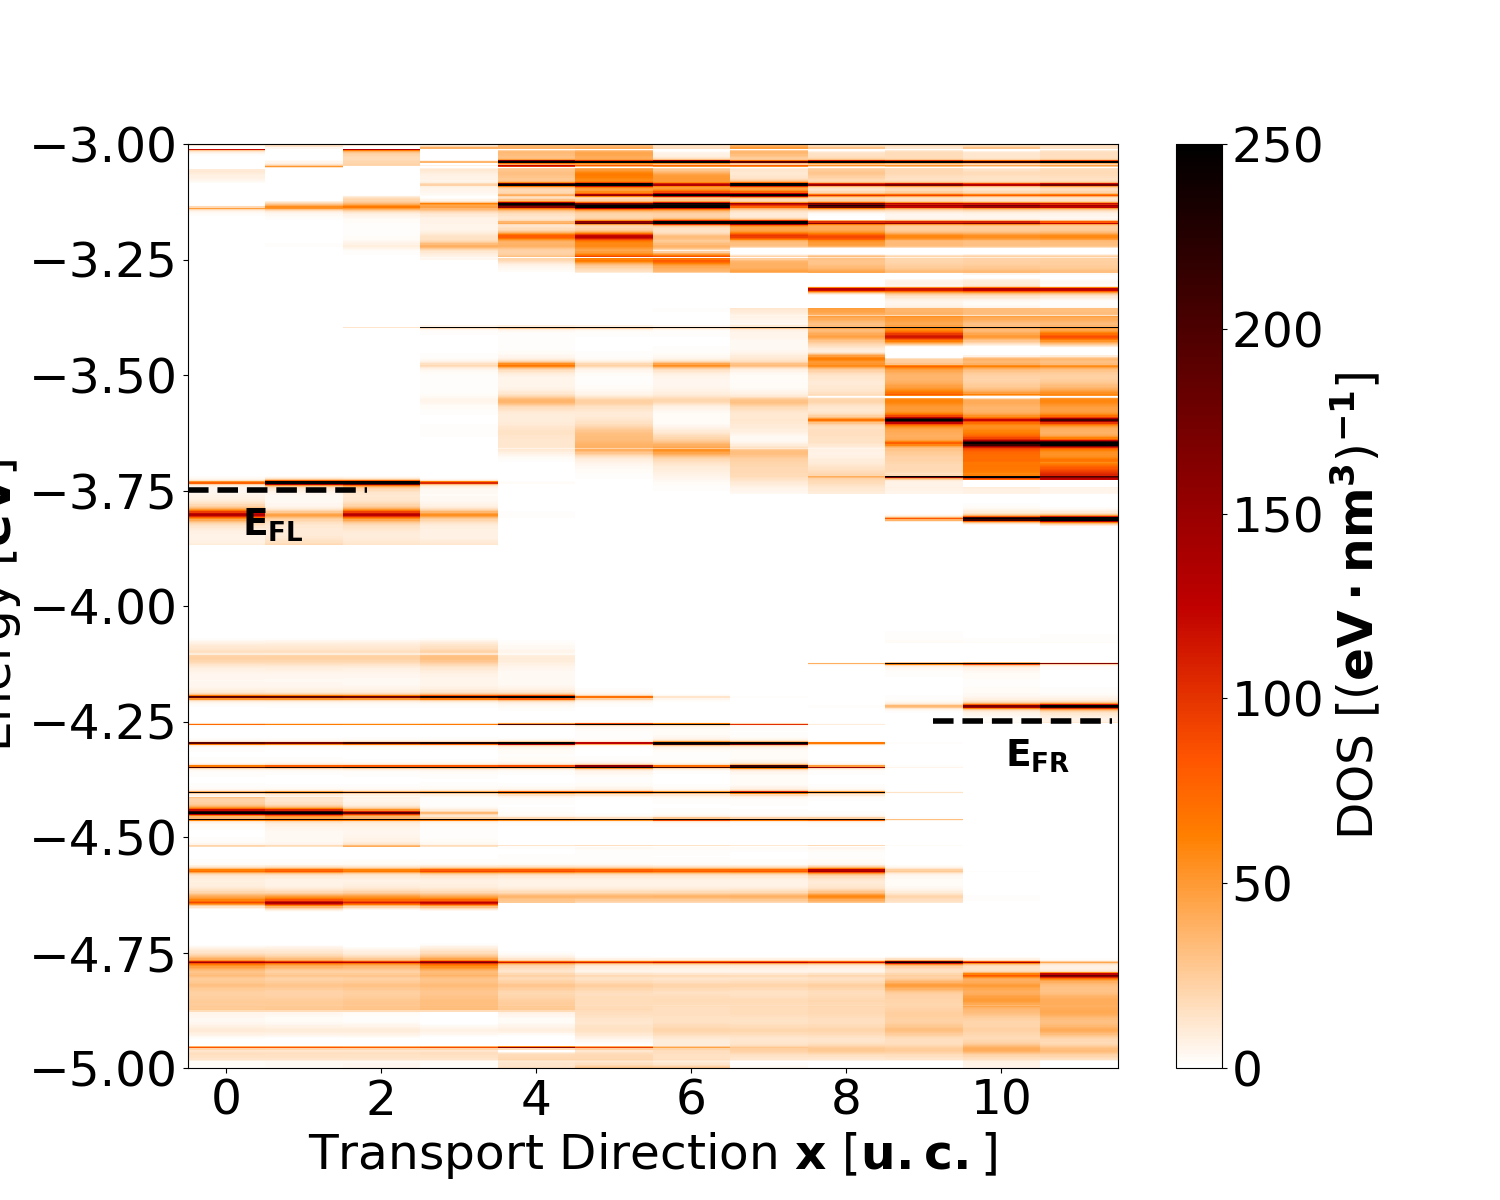

In [12]:
plot_gold(0)

TypeError: Dimensions of C (12, 10000) are incompatible with X (6) and/or Y (12); see help(pcolormesh)

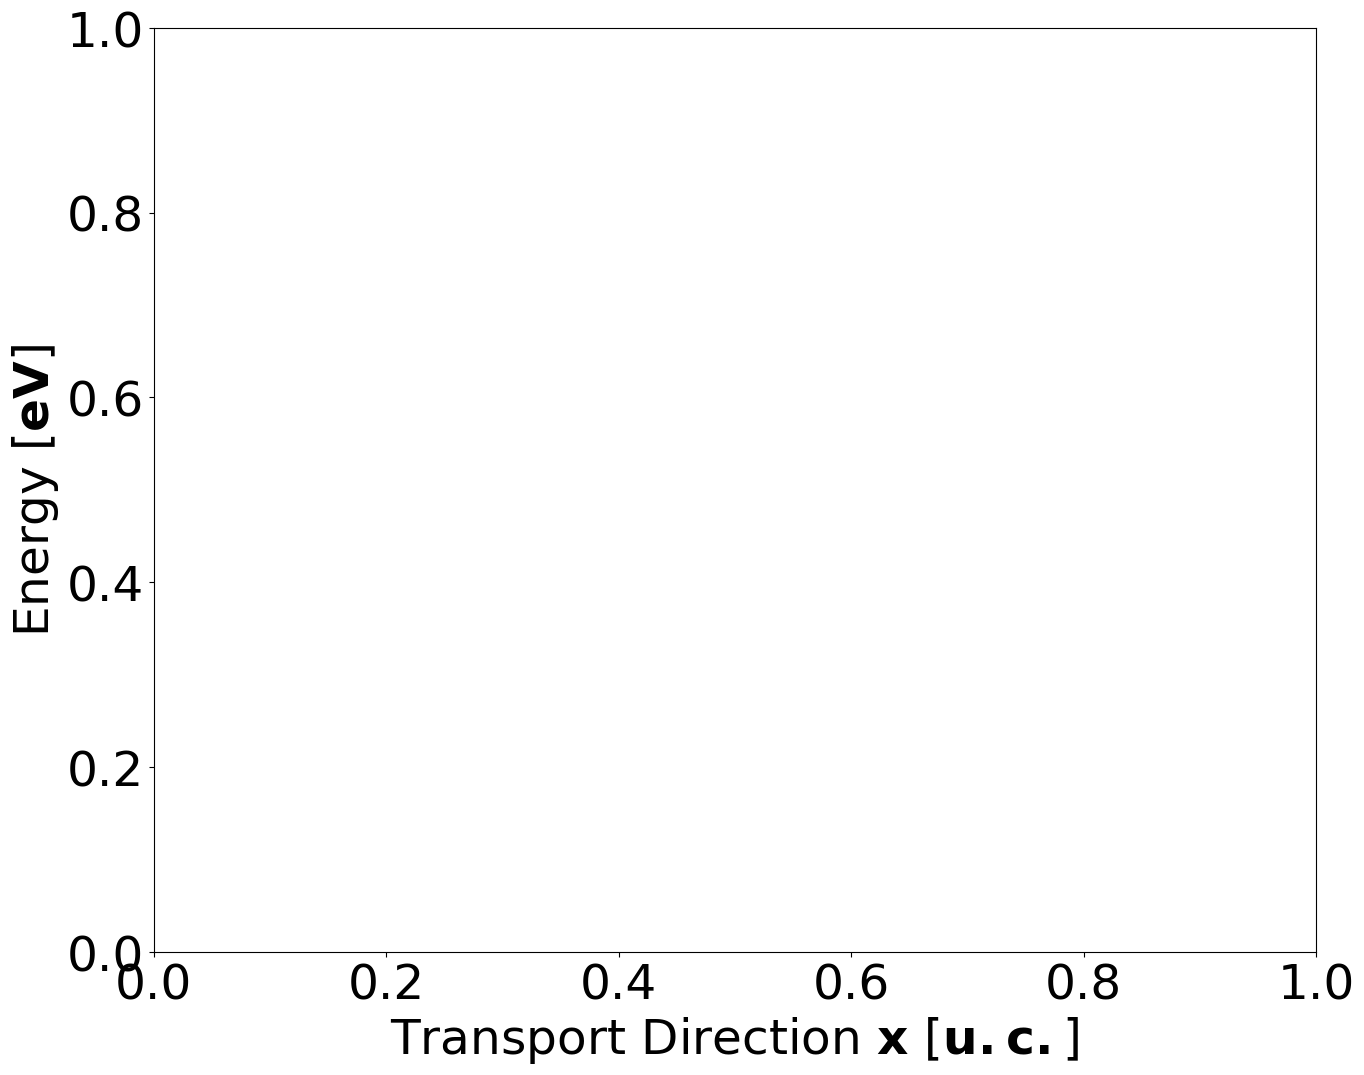

In [38]:
plot_gold(9)

In [ ]:
def plot_line(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    DOS_ZERO = np.loadtxt('DOS_0.dat').view(complex)
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i] - EFL[0]
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E, DOS_ZERO.T.real[0,:], linewidth = 4, label = "Ballistic")
    plt.plot(E-shift, DOS_TEST.T.real[0,:], linewidth = 4, label = "SC-GW at iteration " + str(i))
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 250
    NE = E.shape[0]

    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(0, y_lim + 2)
    plt.xlim(-30, 60)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)


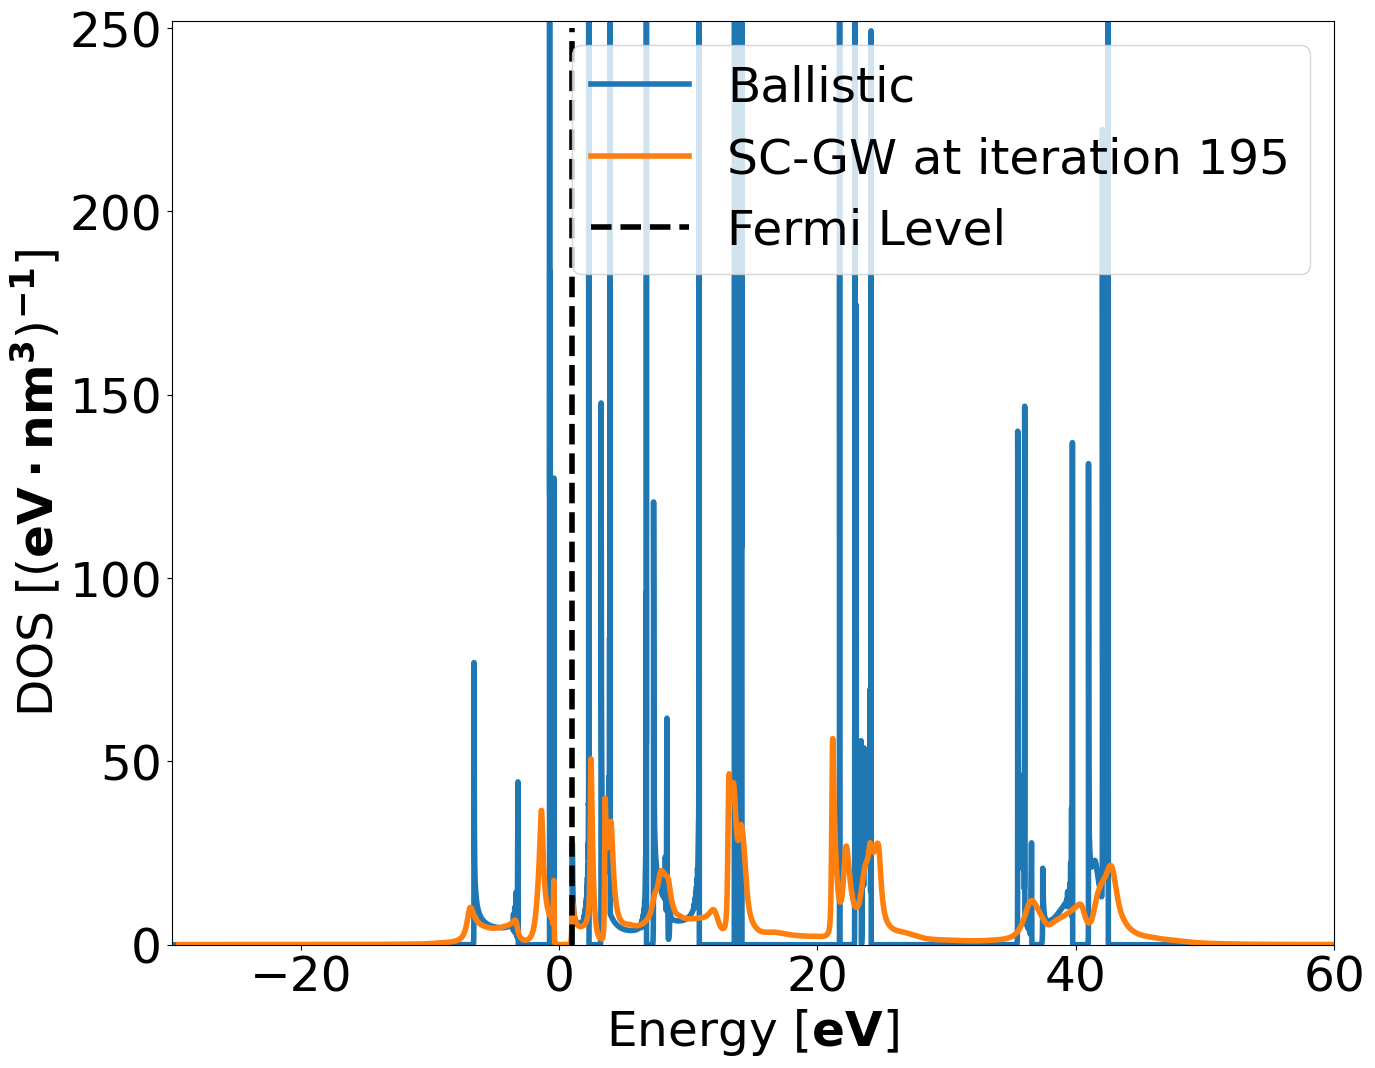

In [ ]:
plot_line(195)